# YARDI NLP ASSIGNMENT (Disaster Sentiment Prediction)

Name - Gaurang Sonkavde

LinkeIn - https://www.linkedin.com/in/gaurang-sonkavde-b02701113/

### Dataset Explaination



## Pipeline

**Overview of Natural Disaster Tweet Sentiment Analysis:**

*   Dataset contains tweet summaries of 9 natural disasters.
*   Aim: Analyze sentiment (positive/negative) from tweets.
* Concatenated datasets for analysis.
* Preprocessing Techniques:


**Preprocessing Techniques:**

* Timestamp format changed for consistency.
* Text preprocessing using the Preprocessor Class.
* Steps include: Removing punctuation, normalizing sentences, removing stopwords, lemmatizing data, and removing Twitter handles.
* New feature "clean_tweet" generated after preprocessing.

**Data Visualization:**

* Analyzed data variation and distribution.
* Identified most frequently occurring words.
* Checked data balance (imbalance led to underfitting).
* Created word clouds using Twitter image masks for positive and negative words.

**Data Splitting and Preparation:**

* Separated features (X) and sentiment labels (y).
* X contains cleaned text data, and y represents positive (1) or negative (0) * sentiment.

**Models Explored for Sentiment Analysis:**

* NBNeuralNetwork, LSTM, and BERT models considered.
* Implemented with PyTorch and Scikit-learn.
* Saved PyTorch models as pickle files for predictions due to computational limitations.
* Attempted GridSearchCV for hyperparameter tuning.

**BERT Model Consideration:**

* Written logic but encountered RAM overwarning during model building.
* Challenging due to computation resources.

**Prediction Models Creation:**

* Utilized trained Neural Network and LSTM classifiers.
* Saved models as pickle files for future sentiment predictions on new data.

**Conclusion:**

* Natural Disaster Tweet Sentiment Analysis performed successfully.
* Preprocessing and visualization techniques aided in understanding the data.
* PyTorch models created for NBNeuralNetwork and LSTM classifiers.
* BERT model considered but faced RAM limitations.
* Overall, an insightful project with potential for real-world applications.

In [2]:
!pip install transformers

In [3]:
pip install skorch


In [4]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
from google.colab import drive
import pandas as pd
import glob
import os
import datetime
import string
import re


import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') # English Dictionary
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objs as go # Contains Hierarchy of Python
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
from collections import Counter
import string
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

from skorch import NeuralNetClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


## Analysing Dataset one by one

In [7]:
testing_df = pd.read_csv(r"/content/drive/MyDrive/Disaster_Management_Dataset/2019Dorian_Summary.csv")
testing_df = testing_df.drop('num',axis=1)

In [8]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       7140 non-null   object 
 1   timestamp  7140 non-null   float64
 2   label      7140 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 167.5+ KB


In [9]:
testing_df.duplicated().sum()

1430

In [10]:
testing_df.isna().sum()

text         0
timestamp    0
label        0
dtype: int64

## Analysis Results
After analysing each dataset using the above method we found following the following issues in some datasets.

2016 Matthew_Summary:
This datset had 1,381 duplicates in it.

2017 Hurricane_Summary:
This dataset had 483 duplicates in it.

2018 Michael_Summary:
This dataset had 646 duplicates in it.
the names for the lables were diffrent as compared to other datsets.
Also the format of timestamp was diffrent from others.

2019 Dorian_Summary:
This dataset had 1430 duplicates in it.

2016 Blizzard_Summary:
the format of timestamp was diffrent from others.






## Cleaning Dataset

#### Removing duplicates

In [11]:
michael_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2018Michael_Summary.csv')
michael_df = michael_df.rename(columns={"Unnamed: 0": "num", "sentiment": "label"})
print("before drop",michael_df.count())
michael_df = michael_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("after drop",michael_df.count())

before drop num          4227
text         4227
timestamp    4227
label        4227
dtype: int64
after drop num          3581
text         3581
timestamp    3581
label        3581
dtype: int64


In [12]:
matthew_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2016Matthew_Summary.csv')
print("before drop",matthew_df.count())
matthew_df = michael_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("after drop",matthew_df.count())

before drop num          5204
text         5204
timestamp    5204
label        5204
dtype: int64
after drop num          3581
text         3581
timestamp    3581
label        3581
dtype: int64


In [13]:
hurricane_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2017Hurricane_Summary.csv')
print("before drop",hurricane_df.count())
hurricane_df = hurricane_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("after drop",hurricane_df.count())

before drop num          7823
text         7823
timestamp    7823
label        7823
dtype: int64
after drop num          7340
text         7340
timestamp    7340
label        7340
dtype: int64


In [14]:
dorian_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2019Dorian_Summary.csv')
print("before drop",dorian_df.count())
dorian_df = dorian_df.drop_duplicates(subset=['text', 'timestamp', 'label'])
print("after drop",dorian_df.count())

before drop num          7140
text         7140
timestamp    7140
label        7140
dtype: int64
after drop num          5710
text         5710
timestamp    5710
label        5710
dtype: int64


#### Converting other csv files to dataframe

In [15]:
sandy_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2012Sandy_Summary.csv')
tornado_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2011Tornado_Summary.csv')
floods_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2013Floods_Summary.csv')
blizzard_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2016Blizzard_Summary.csv')
wildfire_df = pd.read_csv(r'/content/drive/MyDrive/Disaster_Management_Dataset/2018Wildfires_Summary.csv')

#### Converting all the timestamps to same format

In [16]:
pdList = [tornado_df, dorian_df,hurricane_df,michael_df,matthew_df,sandy_df,floods_df,blizzard_df,wildfire_df]  # List of your dataframes
new_df = pd.concat(pdList)
new_df

,num,text,timestamp,label
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,1
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,1
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,0
...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,43418.36111,0
4592,297.0,Yup cali is burning again. #fire #california #...,43320.8,1
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",43419.53889,1
4594,143.0,Zinke: What it will take to prevent deadly wil...,43430.86875,1


In [17]:
def convert_timestamp(timestamp):
  try:
    seconds = (timestamp - 25569) * 86400.0
  except:
    return timestamp
  return datetime.datetime.utcfromtimestamp(seconds).strftime("%m/%d/%Y, %H:%M")

In [18]:
# for key,value in files_dict.items():
#   testing_df = pd.read_csv(value)
#   testing_df['cleaned_timestamp'] = testing_df['timestamp'].apply(convert_timestamp)

In [19]:
new_df['cleaned_timestamp'] = new_df['timestamp'].apply(convert_timestamp)

In [20]:
new_df

,num,text,timestamp,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.897917,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.766667,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,0,"04/24/2011, 18:09"
...,...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,43418.36111,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,43320.8,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",43419.53889,1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,43430.86875,1,"11/26/2018, 20:51"


In [21]:
new_df = new_df.drop('timestamp', axis = 1)
new_df

,num,text,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09"
...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51"


In [22]:
new_df.isna().sum()

num                  0
text                 0
label                0
cleaned_timestamp    0
dtype: int64

In [23]:
new_df.duplicated().sum()

3585

In [24]:
new_df.drop_duplicates(inplace=True)

In [25]:
new_df.duplicated().sum()

0

In [26]:
new_df

,num,text,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09"
...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51"


In [27]:
new_df['text'].unique()

array(['RT @uberdogfound: Please RT - Food needed for shelter in NC in area that was hit hard by tornado. Please contact us at…',
       'Please RT - Food needed for shelter in NC in area that was hit hard by tornado.  Please contact us at info@uberdogfoundation.org to help!',
       '‚ô°its raining and tornado warnings....about to be in a coma from eating all this food in a few!!!‚òª‚òª',
       ...,
       'Yup, 200 million dollars waisted on "comfort soldiers" positioned 90 miles from the border, while California citizens are being roasted alive in their cars fleeing from wildfires!!  Thank you Donald Trump for your complete lack of sympathy & your lack of assistance!!!',
       'Zinke: What it will take to prevent deadly wildfires get YOU out of office, especially since you wasted fire money for a ride, BYE ZINKE... @CNNhttps://cnn.it/2DGZ7YN¬†',
       'Zinke\'s absurd & unscientific "theory" on California\'s wildfires ?\nShows exactly how incompetent, ignorant & how anyone can ri

Preprocessing function

In [28]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

class PreProcessor:
    def __init__(self):
        self.stop_words = set(stopwords.words("english"))
        self.lemmatizer = WordNetLemmatizer()

    def remove_punctuation(self, record):
        cleaned_str = [char for char in record if char not in string.punctuation]
        return ''.join(cleaned_str)

    def normalize_sentences(self, sentences):
        words = word_tokenize(sentences)  # Use word_tokenize for better tokenization
        return words

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stop_words]

    def lemmatize_words(self, words):
        return [self.lemmatizer.lemmatize(word) for word in words]

    def remove_twitter_handles(self, text):
        return re.sub(r'@[\w]*', '', text)

    def process(self, record):
        # Remove Twitter Handles
        sentences = self.remove_twitter_handles(record)

        # Remove Punctuation
        sentences = self.remove_punctuation(sentences)

        # Normalize and Tokenize using word_tokenize from NLTK
        norm_words = self.normalize_sentences(sentences)

        # Remove Stopwords
        final_words = self.remove_stopwords(norm_words)

        # Lemmatization
        lemmatized_words = self.lemmatize_words(final_words)

        return lemmatized_words


In [29]:
processor = PreProcessor()
processor.process("Hi! This is my assignment for yardi !, Hope you like it till here :).")

['Hi', 'This', 'assignment', 'yardi', 'Hope', 'like', 'till']

In [30]:
new_df

,num,text,label,cleaned_timestamp
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24"
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24"
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33"
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24"
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09"
...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39"
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12"
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56"
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51"


According to this new cleaned and preprocessed dataset (new_df)



*   timestamp --> cleaned_timestamp
*   test --> clean_tweet



In [31]:
# Apply the PreProcessor on the 'text' column of new_df
new_df['clean_tweet'] = new_df['text'].apply(processor.process)
new_df

,num,text,label,cleaned_timestamp,clean_tweet
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24","[RT, Please, RT, Food, needed, shelter, NC, ar..."
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24","[Please, RT, Food, needed, shelter, NC, area, ..."
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33","[‚ô°its, raining, tornado, warningsabout, coma..."
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24","[Lmao, damn, RT, If, I, dont, get, food, I, ho..."
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09","[Saved, tornado, warningIm, ready, eat, good, ..."
...,...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39","[Yumi, donating, FREE, organic, baby, food, di..."
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12","[Yup, cali, burning, fire, california, triumph..."
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56","[Yup, 200, million, dollar, waisted, comfort, ..."
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51","[Zinke, What, take, prevent, deadly, wildfire,..."


In [32]:
new_df.groupby('label').describe()

num                                                             \
         count          mean           std  min      25%     50%      75%   
label                                                                       
0       8201.0  2.979515e+16  1.678229e+17  0.0  1317.00  3484.0  8559.00   
1      26030.0  3.818548e+16  1.891440e+17  0.0  1226.25  2640.5  8535.75   

                     
                max  
label                
0      1.170000e+18  
1      1.170000e+18

In [33]:
new_df['len'] = new_df['clean_tweet'].str.len()

In [34]:
new_df

,num,text,label,cleaned_timestamp,clean_tweet,len
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,1,"04/24/2011, 23:24","[RT, Please, RT, Food, needed, shelter, NC, ar...",15
1,1.0,Please RT - Food needed for shelter in NC in a...,1,"04/24/2011, 23:24","[Please, RT, Food, needed, shelter, NC, area, ...",15
2,3.0,‚ô°its raining and tornado warnings....about t...,1,"04/24/2011, 21:33","[‚ô°its, raining, tornado, warningsabout, coma...",8
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,1,"04/24/2011, 18:24","[Lmao, damn, RT, If, I, dont, get, food, I, ho...",17
4,10.0,Saved by the tornado warning....I'm just ready...,0,"04/24/2011, 18:09","[Saved, tornado, warningIm, ready, eat, good, ...",7
...,...,...,...,...,...,...
4591,1844.0,Yumi is donating FREE organic baby food to tho...,0,"11/14/2018, 08:39","[Yumi, donating, FREE, organic, baby, food, di...",23
4592,297.0,Yup cali is burning again. #fire #california #...,1,"08/08/2018, 19:12","[Yup, cali, burning, fire, california, triumph...",19
4593,1933.0,"Yup, 200 million dollars waisted on ""comfort s...",1,"11/15/2018, 12:56","[Yup, 200, million, dollar, waisted, comfort, ...",26
4594,143.0,Zinke: What it will take to prevent deadly wil...,1,"11/26/2018, 20:51","[Zinke, What, take, prevent, deadly, wildfire,...",18


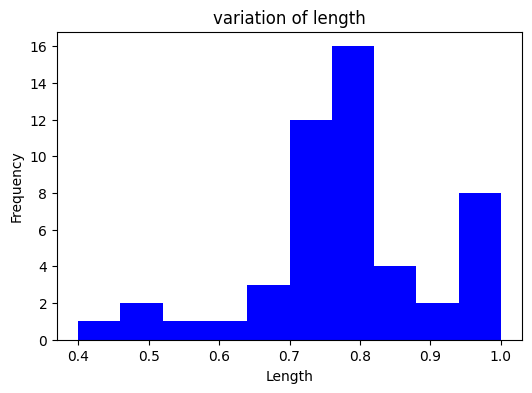

In [35]:
new_df.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

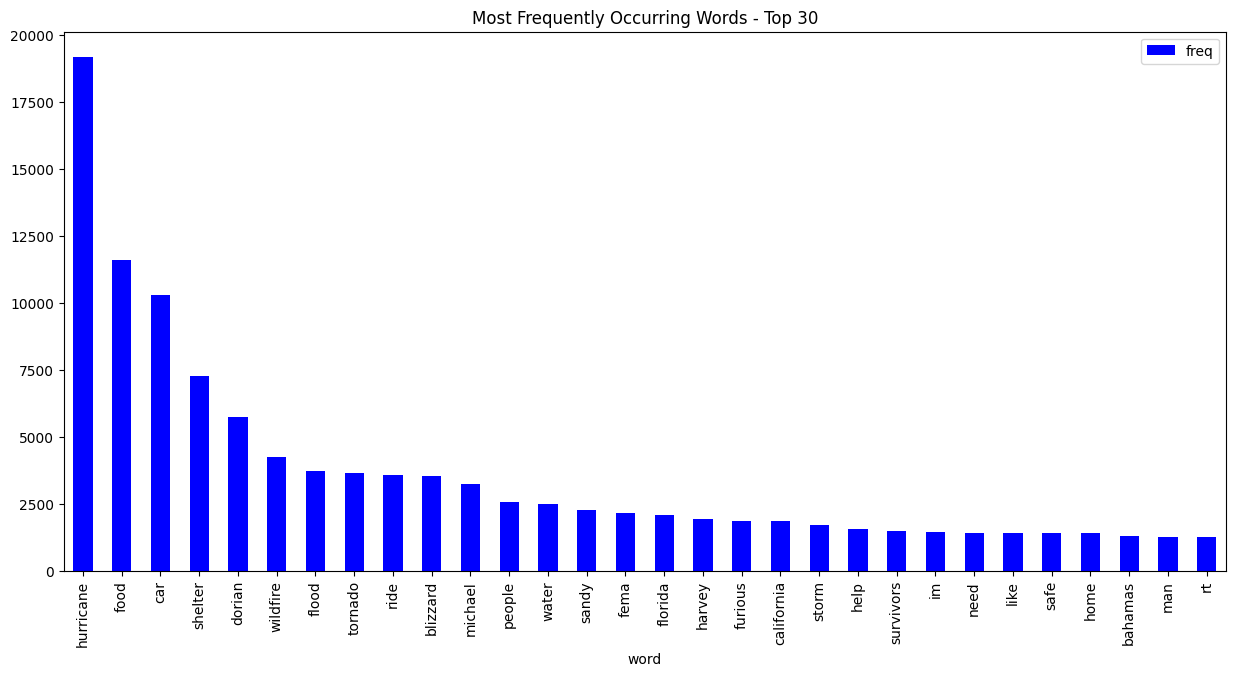

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming the 'clean_tweet' column contains lists of words
# Convert each list of words into a single string by joining them with space
new_df['clean_tweet_str'] = new_df['clean_tweet'].apply(lambda words: ' '.join(words))

# Now use the CountVectorizer with the new 'clean_tweet_str' column
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(new_df['clean_tweet_str'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
plt.title("Most Frequently Occurring Words - Top 30")
plt.show()


In [37]:
# new_df.to_csv('Final_clean_data.csv')

### Sentiment
Let's see how the dataset is distributed between the positive and negative sentiment values.

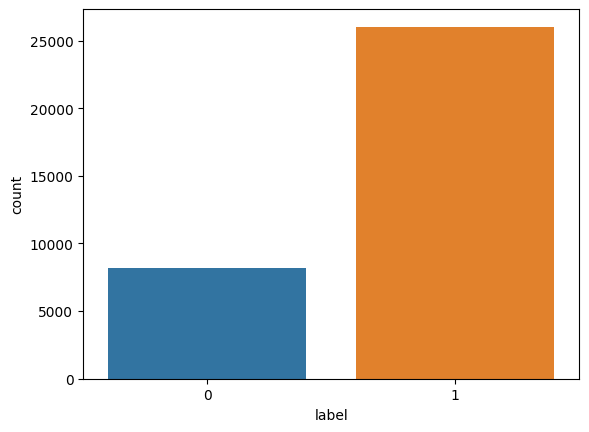

In [38]:
sns.countplot(x = new_df['label'])
plt.show()

In [39]:
temp = new_df.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,text
1,1,26030
0,0,8201


In [40]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In Sentiment Analysis tasks, the dataset may suffer from class imbalance, where one sentiment class (e.g., positive or negative) is significantly more frequent than the other. This imbalance can affect the model's performance and bias it towards the majority class.

Undersampling

In [41]:
count_class_1,count_class_0 = new_df.label.value_counts()
df_class_0 = new_df[new_df['label']==0]
df_class_1 = new_df[new_df['label']==1]

In [42]:
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under,df_class_0],axis=0)
df_test_under.shape

(16402, 7)

<Axes: xlabel='label', ylabel='count'>

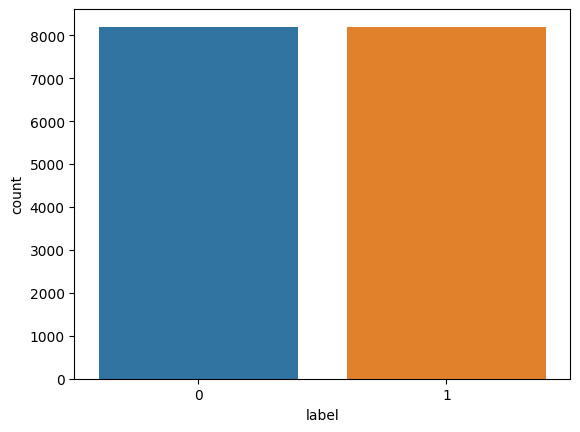

In [43]:
sns.countplot(x='label',data=df_test_under)

In [44]:
df_test_under = df_test_under.drop(["num","cleaned_timestamp"],axis=1)

In [45]:
positive = df_test_under[df_test_under['label']==1]
positive

,text,label,clean_tweet,len,clean_tweet_str
6231,This stupid Hurricane Harvey better not damage...,1,"[This, stupid, Hurricane, Harvey, better, dama...",7,This stupid Hurricane Harvey better damage car
1025,FWD: FR:Miami U\nSUBJ:Tornado Warning\nMSG:Tor...,1,"[FWD, FRMiami, U, SUBJTornado, Warning, MSGTor...",16,FWD FRMiami U SUBJTornado Warning MSGTornado W...
2706,Florida Sheriff Exploits Desperate Hurricane V...,1,"[Florida, Sheriff, Exploits, Desperate, Hurric...",15,Florida Sheriff Exploits Desperate Hurricane V...
2006,"In NC, drunk who got car stuck in snow this bl...",1,"[In, NC, drunk, got, car, stuck, snow, blizzar...",14,In NC drunk got car stuck snow blizzard shot k...
2108,In a tornado shelter were not Kansas anymore T...,1,"[In, tornado, shelter, Kansas, anymore, Toto, ...",12,In tornado shelter Kansas anymore Toto First f...
...,...,...,...,...,...
986,"Sad ""@AP: Colo. flood victims return to find r...",1,"[Sad, Colo, flood, victim, return, find, rotte...",17,Sad Colo flood victim return find rotten food ...
2002,Hero Nurse Takes Delivery Of All-New Toyota Tu...,1,"[Hero, Nurse, Takes, Delivery, Of, AllNew, Toy...",33,Hero Nurse Takes Delivery Of AllNew Toyota Tun...
243,Gotta do all the food and water shopping since...,1,"[Got, ta, food, water, shopping, since, mom, d...",16,Got ta food water shopping since mom dont take...
2858,I-70 strong tornado st louis metor ...rivervie...,1,"[I70, strong, tornado, st, louis, metor, river...",11,I70 strong tornado st louis metor riverviewpeo...


In [46]:
negative = df_test_under[df_test_under['label']==0]
negative

,text,label,clean_tweet,len,clean_tweet_str
4,Saved by the tornado warning....I'm just ready...,0,"[Saved, tornado, warningIm, ready, eat, good, ...",7,Saved tornado warningIm ready eat good food
6,We'll be accepting donations of food to be dis...,0,"[Well, accepting, donation, food, distributed,...",12,Well accepting donation food distributed torna...
7,"Go, See, Do: At the game, Lowes Foods will be ...",0,"[Go, See, Do, At, game, Lowes, Foods, acceptin...",14,Go See Do At game Lowes Foods accepting donati...
9,Raleigh neighbors reach out to tornado victims...,0,"[Raleigh, neighbor, reach, tornado, victim, A,...",14,Raleigh neighbor reach tornado victim A Raleig...
10,Wow! Crazy day getting food for this week. Tor...,0,"[Wow, Crazy, day, getting, food, week, Tornado...",14,Wow Crazy day getting food week Tornado warnin...
...,...,...,...,...,...
4498,Worried about wildfires? I am too. Help me mit...,0,"[Worried, wildfire, I, Help, mitigate, climate...",16,Worried wildfire I Help mitigate climate chang...
4533,"Yea, growing food is going to help stop wildfi...",0,"[Yea, growing, food, going, help, stop, wildfi...",15,Yea growing food going help stop wildfire No w...
4561,You can donate food to families impacted by th...,0,"[You, donate, food, family, impacted, Calif, w...",29,You donate food family impacted Calif wildfire...
4590,Yumi is donating FREE organic baby food to tho...,0,"[Yumi, donating, FREE, organic, baby, food, di...",23,Yumi donating FREE organic baby food displaced...


# Wordcloud

In [47]:
mask = np.array(Image.open('/content/drive/MyDrive/Disaster_Management_Dataset/twitter_mask.png'))

Wordcloud of Frequent Words (Combined)

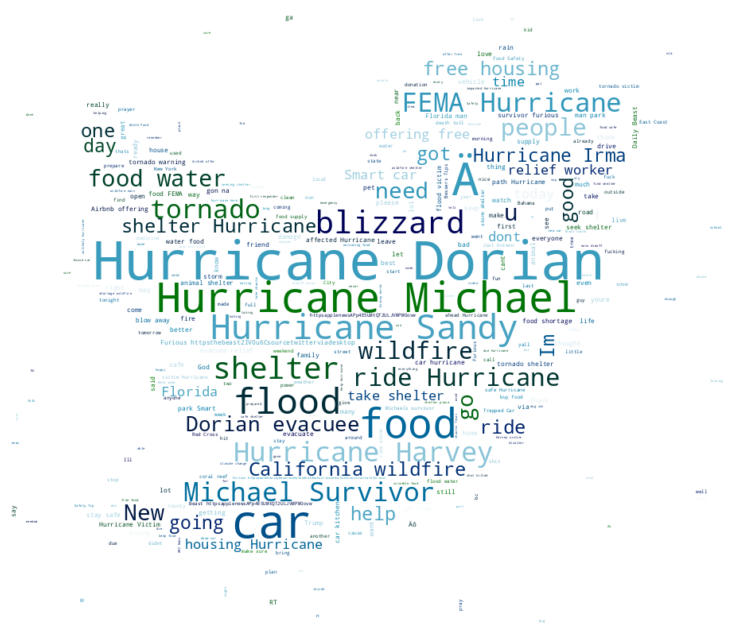

In [48]:
wc = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "white",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               height = mask.shape[0],colormap='ocean')

wc.generate(''.join(df_test_under['clean_tweet_str']))
plt.figure(figsize=[16,8])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


Wordcloud of Positive Words

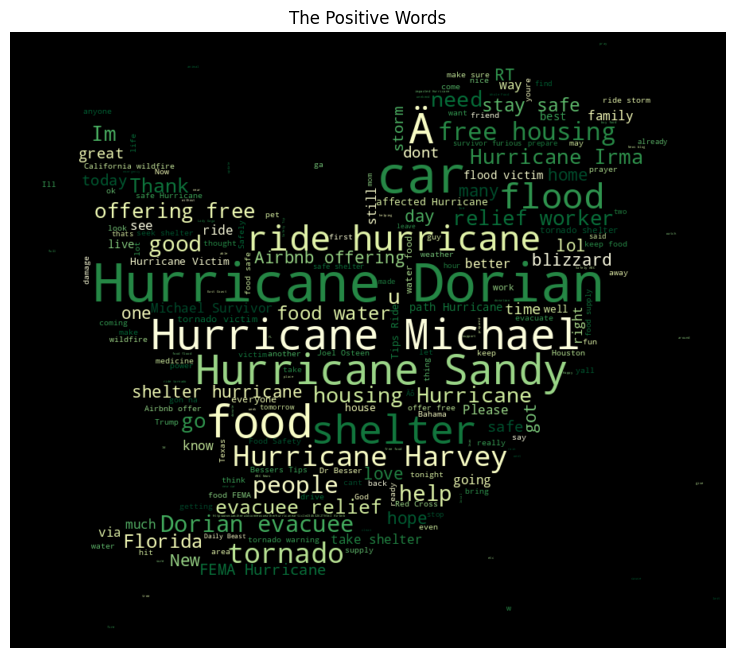

In [49]:
wc2 = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "black",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[0],
               height = mask.shape[0],colormap='YlGn')
wc2.generate((' '.join([text for text in df_test_under['clean_tweet_str'][df_test_under['label'] == 0]])))
plt.figure(figsize=[16,8])
plt.title('The Positive Words')
plt.imshow(wc2, interpolation="bilinear")
plt.axis('off')
plt.show()

Wordcloud of Negative Words

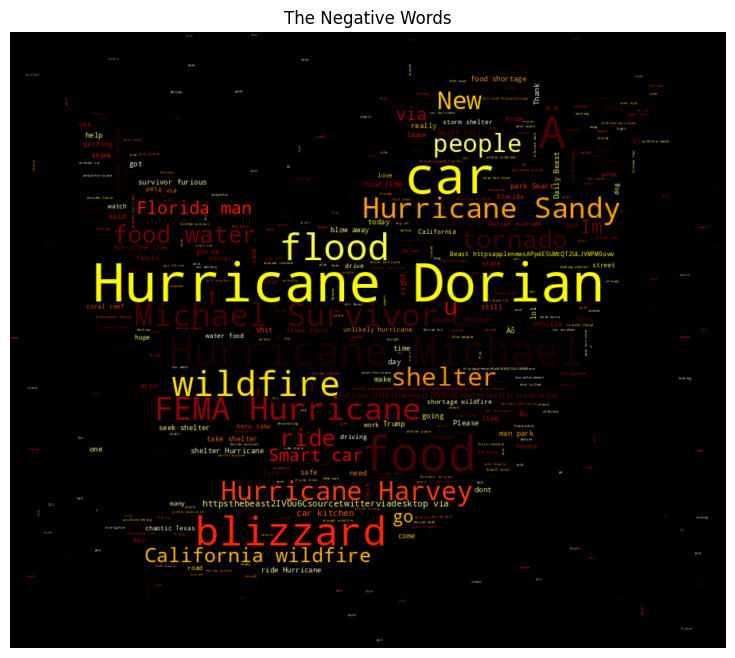

In [50]:
wc3 = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "black",
               max_words = 600, max_font_size = 500,
               random_state = 42, width = mask.shape[0],
               height = mask.shape[0],colormap='hot')

wc3.generate((' '.join([text for text in df_test_under['clean_tweet_str'][df_test_under['label'] == 1]])))
plt.figure(figsize=[16,8])
plt.title('The Negative Words')
plt.imshow(wc3, interpolation="bilinear")
plt.axis('off')
plt.show()

# Model Building

Feature (X) and Label(y) split

In [51]:
X= df_test_under['text']
y =df_test_under['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(f'shape of train data is {X_train.shape}')
print(f'shape of test data is {X_test.shape}')

shape of train data is (13121,)
shape of test data is (3281,)


In [52]:
X

6231    This stupid Hurricane Harvey better not damage...
1025    FWD: FR:Miami U\nSUBJ:Tornado Warning\nMSG:Tor...
2706    Florida Sheriff Exploits Desperate Hurricane V...
2006    In NC, drunk who got car stuck in snow this bl...
2108    In a tornado shelter were not Kansas anymore T...
                              ...                        
4498    Worried about wildfires? I am too. Help me mit...
4533    Yea, growing food is going to help stop wildfi...
4561    You can donate food to families impacted by th...
4590    Yumi is donating FREE organic baby food to tho...
4591    Yumi is donating FREE organic baby food to tho...
Name: text, Length: 16402, dtype: object

In [53]:
# Preprocess the data using the PreProcessor class
X_train_preprocessed = X_train.apply(lambda x: ' '.join(processor.process(x)))
X_test_preprocessed = X_test.apply(lambda x: ' '.join(processor.process(x)))


In [54]:
X_train_preprocessed

2676    1954 A tornado near Nanaimo British Columbia C...
1995    im sad 78YearOld Woman Found Dead Inside Car H...
6492    Hurricane Harvey car wreckage likely worst US ...
1718    Lake View North Johns AL seek shelter Large to...
1623    Boy donates saving Disney trip Hurricane Doria...
                              ...                        
1551    No Food No FEMA Hurricane Michael ’ Survivors ...
2953    But real praying Haiti hurricane hit I know Go...
1613    Dramatic Video Shows Police Rescuing Shelter A...
2546    No Food No FEMA Hurricane Michael ’ Survivors ...
1723    6yearold South Carolina boy giving away free f...
Name: text, Length: 13121, dtype: object

Simple Neural Network Classifier - Basic Implementation Done

Done with Pytorch

In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Create CountVectorizer to handle text preprocessing
vectorizer = CountVectorizer(lowercase=False, stop_words=None)
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# Convert sparse matrix to dense matrix
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetworkClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Get the input dimension for the classifier
input_dim = X_train_dense.shape[1]

# Define hyperparameters for the neural network classifier
hidden_dim = 256
output_dim = 2
learning_rate = 0.001
num_epochs = 5

# Initialize the classifier
classifier = NeuralNetworkClassifier(input_dim, hidden_dim, output_dim)

# Set up optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)

# Create DataLoader objects for train, validation, and test sets
batch_size = 64
train_dataset = TensorDataset(torch.tensor(X_train_dense, dtype=torch.float32), y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(X_test_dense, dtype=torch.float32), y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Lists to store training loss and accuracy at each epoch
train_losses = []
train_accuracies = []

# Train the classifier
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    classifier.train()
    train_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        predictions = classifier(inputs.float())
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = torch.max(predictions, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate accuracy and append to lists
    train_accuracy = correct_predictions / total_samples
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy:.4f}")

# Evaluate the classifier
classifier.eval()
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        predictions = classifier(inputs.float())
        preds = torch.argmax(predictions, dim=1)
        all_preds.extend(preds.cpu().numpy())

y_pred = pd.Series(all_preds)




Epoch 1/5, Training Loss: 0.5134, Training Accuracy: 0.7460
Epoch 2/5, Training Loss: 0.2302, Training Accuracy: 0.9065
Epoch 3/5, Training Loss: 0.0942, Training Accuracy: 0.9661
Epoch 4/5, Training Loss: 0.0440, Training Accuracy: 0.9865
Epoch 5/5, Training Loss: 0.0235, Training Accuracy: 0.9941


In [107]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_tensor, y_pred)
precision = precision_score(y_test_tensor, y_pred)
recall = recall_score(y_test_tensor, y_pred)
f1 = f1_score(y_test_tensor, y_pred)

print("Neural Network Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Neural Network Classifier Results:
Accuracy: 0.7943
Precision: 0.7999
Recall: 0.7848
F1 Score: 0.7922


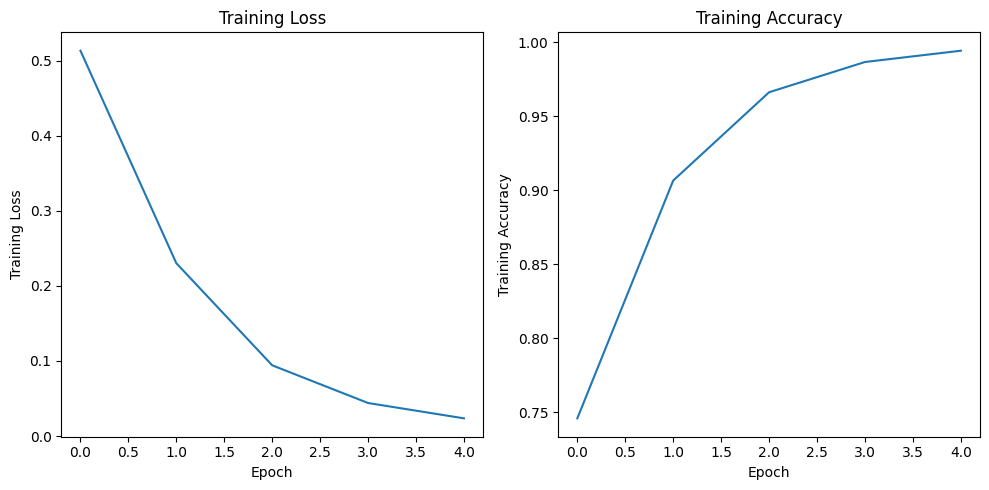

In [108]:
# Plot training loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy")

plt.tight_layout()
plt.show()


In [109]:
# Save the trained model as a pickle file
import pickle

# Save the trained LSTM classifier to a pickle file
with open('nn_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

# Save the CountVectorizer as a separate pickle file
with open('nn_Vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

Done using sk-learn

In [ ]:
# from sklearn.pipeline import Pipeline

# # Create a pipeline with CountVectorizer and MultinomialNB
# pipeline = Pipeline([
#     ('vectorizer', CountVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# # Define the hyperparameter grid for the classifier
# param_grid_nn = {
#     'vectorizer__stop_words': [None, 'english'],
#     'vectorizer__lowercase': [False, True],
#     'classifier__alpha': [0.1, 0.01, 0.001],
#     'classifier__fit_prior': [True, False]
# }

# # Create the GridSearchCV object for the classifier pipeline
# grid_search_nn = GridSearchCV(pipeline, param_grid_nn, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object on the training data
# grid_search_nn.fit(X_train_preprocessed, y_train)

# # Get the best hyperparameters for the classifier
# best_params_nn = grid_search_nn.best_params_
# print("Best Hyperparameters for Simple Neural Network Classifier:", best_params_nn)

# # Train and evaluate the classifier with the best hyperparameters
# classifier_nn = grid_search_nn.best_estimator_

# # Predict on the test data
# y_pred = classifier_nn.predict(X_test_preprocessed)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Neural Network Classifier Results:")
# print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Best Hyperparameters for Simple Neural Network Classifier: {'classifier__alpha': 0.1, 'classifier__fit_prior': False, 'vectorizer__lowercase': True, 'vectorizer__stop_words': 'english'}
Neural Network Classifier Results:
Accuracy: 0.7412, Precision: 0.7631, Recall: 0.6994, F1 Score: 0.7299


LSTM Classifier for Sentiment Based Prediction

Was trying with GridSearchCV for Hyperparameter tuning but due to Computational Problem couldnt implement it properly, Getting below given error:

Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out Colab Pro.

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import pandas as pd
# import matplotlib.pyplot as plt
# from skorch import NeuralNetClassifier

# # Define the LSTM-based text classifier
# class LSTMClassifier(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes):
#         super(LSTMClassifier, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out, _ = self.lstm(x.unsqueeze(1))
#         out = self.fc(out[:, -1, :])
#         return out

# # Convert text data to numerical vectors using CountVectorizer
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # Get input size and number of classes
# input_size = X_train_vectorized.shape[1]
# num_classes = len(set(y_train))

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Create DataLoader objects for train and test sets with a smaller batch size
# batch_size = 32
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Create the LSTM-based classifier with reduced hidden size and fewer layers
# hidden_size = 128
# num_layers = 1
# lstm_classifier = NeuralNetClassifier(
#     module=LSTMClassifier,
#     module__input_size=input_size,
#     module__hidden_size=hidden_size,
#     module__num_layers=num_layers,
#     module__num_classes=num_classes,
#     criterion=nn.CrossEntropyLoss,
#     optimizer=optim.Adam,
#     lr=0.001,
#     batch_size=32,
#     iterator_train__shuffle=True,
#     max_epochs=5,
#     device='cuda' if torch.cuda.is_available() else 'cpu',
# )

# # Perform hyperparameter tuning using GridSearchCV with a reduced parameter grid
# param_grid = {
#     'module__hidden_size': [128],
#     'module__num_layers': [1],
#     'lr': [0.001, 0.01],
#     'batch_size': [32],
#     'max_epochs': [5],
# }

# grid_search = GridSearchCV(lstm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_tensor, y_train_tensor)

# # Get the best hyperparameters for the LSTM-based classifier
# best_params = grid_search.best_params_
# print("Best Hyperparameters for LSTM Classifier:", best_params)

# # Train the best LSTM classifier using the best hyperparameters
# best_lstm_classifier = grid_search.best_estimator_
# best_lstm_classifier.fit(X_train_tensor, y_train_tensor)

# # Evaluate the best LSTM classifier on the test set
# y_pred = best_lstm_classifier.predict(X_test_tensor)

# # Evaluate the best LSTM classifier
# accuracy = accuracy_score(y_test_tensor, y_pred)
# precision = precision_score(y_test_tensor, y_pred)
# recall = recall_score(y_test_tensor, y_pred)
# f1 = f1_score(y_test_tensor, y_pred)

# print("Best LSTM Classifier Results:")
# print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# # Plot accuracy and loss
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(range(1, len(best_lstm_classifier.history) + 1), best_lstm_classifier.history[:, 'train_loss'], label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(range(1, len(best_lstm_classifier.history) + 1), best_lstm_classifier.history[:, 'train_accuracy'], label='Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


LSTM Classifier Model made with predefined parameters - done with trial and error method due to computational efficiency problem in previous snippet

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Define the LSTM-based text classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x.unsqueeze(1))
        out = self.fc(out[:, -1, :])
        return out

 # Convert text data to numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Get input size and number of classes
input_size = X_train_vectorized.shape[1]
num_classes = len(set(y_train))

In [67]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_vectorized.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_vectorized.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader objects for train and test sets
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create the LSTM-based classifier
hidden_size = 256
num_layers = 2
lstm_classifier = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Set up optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_classifier.parameters(), lr=0.001)

# Lists to store training loss and accuracy at each epoch
train_losses = []
train_accuracies = []

# Train the LSTM-based classifier
num_epochs = 5
for epoch in range(num_epochs):
    lstm_classifier.train()
    train_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = lstm_classifier(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    # Calculate accuracy and append to lists
    train_accuracy = correct_predictions / total_samples
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy:.4f}")

# Evaluate the LSTM-based classifier on the test set
lstm_classifier.eval()
with torch.no_grad():
    outputs_test = lstm_classifier(X_test_tensor)
    _, predicted = torch.max(outputs_test, 1)

    y_pred = pd.Series(predicted.cpu().numpy())

# Evaluate the LSTM-based classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("LSTM Classifier Results:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")



Epoch 1/5, Training Loss: 0.5142, Training Accuracy: 0.7403
Epoch 2/5, Training Loss: 0.2463, Training Accuracy: 0.9009
Epoch 3/5, Training Loss: 0.0978, Training Accuracy: 0.9647
Epoch 4/5, Training Loss: 0.0391, Training Accuracy: 0.9869
Epoch 5/5, Training Loss: 0.0223, Training Accuracy: 0.9921
LSTM Classifier Results:
Accuracy: 0.7940, Precision: 0.7890, Recall: 0.8024, F1 Score: 0.7956


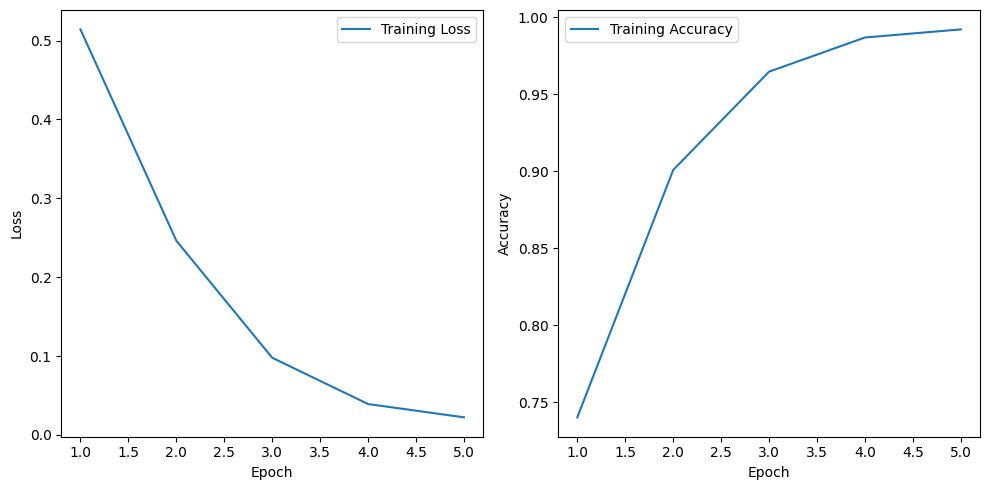

In [71]:
## Plot accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [72]:
# Save the trained model as a pickle file
import pickle

# Save the trained LSTM classifier to a pickle file
with open('lstm_classifier.pkl', 'wb') as f:
    pickle.dump(lstm_classifier, f)


# Save the CountVectorizer as a separate pickle file
with open('lstm_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

BERT Model Training

Tried with the Transformer method too i.e BERT, keeping Pipeline for your review but having Computetional issues (halting in between)

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import pickle
import time

def train_bert_model(X_train, y_train, X_test, y_test):
    BERT_Tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    BERT_Model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
    BERT_Model.requires_grad = True  # Allow fine-tuning

    # Tokenize and encode the text data
    X_train_tokenized = BERT_Tokenizer.batch_encode_plus(X_train, padding=True, truncation=True, return_tensors='pt')
    X_test_tokenized = BERT_Tokenizer.batch_encode_plus(X_test, padding=True, truncation=True, return_tensors='pt')

    # Convert labels to PyTorch tensors
    y_train_tensor = torch.tensor(y_train.values)
    y_test_tensor = torch.tensor(y_test.values)

    # Create TensorDatasets for training and testing data
    train_dataset = TensorDataset(X_train_tokenized['input_ids'], X_train_tokenized['attention_mask'], y_train_tensor)
    test_dataset = TensorDataset(X_test_tokenized['input_ids'], X_test_tokenized['attention_mask'], y_test_tensor)

    # Split train dataset into train and validation datasets
    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size
    train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

    # Create DataLoader objects for train, validation, and test sets
    batch_size = 32  # Increase the batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Set up optimizer and loss function for fine-tuning
    optimizer = optim.AdamW(BERT_Model.parameters(), lr=2e-5)
    criterion = nn.CrossEntropyLoss()

    # Train the BERT model
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    BERT_Model.to(device)

    num_epochs = 5  # Increase the number of epochs for fine-tuning

    total_time_start = time.time()  # Track the total training time

    for epoch in range(num_epochs):
        epoch_time_start = time.time()  # Track the start time of each epoch
        BERT_Model.train()
        train_loss = 0.0

        for batch in train_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = BERT_Model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)  # Use your own labels for fine-tuning
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss / len(train_loader):.4f}")

        epoch_time_end = time.time()  # Track the end time of each epoch
        epoch_time = epoch_time_end - epoch_time_start
        print(f"Time taken for Epoch {epoch + 1}: {epoch_time:.2f} seconds")

    total_time_end = time.time()  # Track the end time of training
    total_training_time = total_time_end - total_time_start
    print(f"Total training time: {total_training_time:.2f} seconds")

    # Evaluate the BERT model
    BERT_Model.eval()
    all_preds = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = BERT_Model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())

    y_pred_bert = pd.Series(all_preds)

    # Evaluate the BERT model
    accuracy_bert = accuracy_score(y_test, y_pred_bert)
    precision_bert = precision_score(y_test, y_pred_bert)
    recall_bert = recall_score(y_test, y_pred_bert)
    f1_bert = f1_score(y_test, y_pred_bert)

    print("BERT Model Results:")
    print(f"Accuracy: {accuracy_bert:.4f}, Precision: {precision_bert:.4f}, Recall: {recall_bert:.4f}, F1 Score: {f1_bert:.4f}")

    return BERT_Model, BERT_Tokenizer


In [ ]:
# Call the train_bert_model function to train and evaluate the BERT model
BERT_Model, BERT_Tokenizer = train_bert_model(X_train, y_train, X_test, y_test)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Save the trained BERT model and tokenizer as pickle files
model_filename = 'trained_bert_model.pkl'
tokenizer_filename = 'trained_bert_tokenizer.pkl'

with open(model_filename, 'wb') as f_model:
    pickle.dump(BERT_Model, f_model)

with open(tokenizer_filename, 'wb') as f_tokenizer:
    pickle.dump(BERT_Tokenizer, f_tokenizer)

print("BERT model and tokenizer saved as:", model_filename, tokenizer_filename)

Prediction using LSTM

In [89]:

# Define the LSTM-based text classifier
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x.unsqueeze(1))
        out = self.fc(out[:, -1, :])
        return out

In [84]:
# Convert text data to numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [90]:
# Load the trained LSTM classifier from the pickle file
with open('lstm_classifier.pkl', 'rb') as f:
    lstm_classifier = pickle.load(f)

# Load the pickled CountVectorizer along with its vocabulary
with open('lstm_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [92]:
def predict_sentiment(text):
    # Convert the input text to a numerical vector using the loaded vectorizer
    text_vectorized = vectorizer.transform([text])

    # Ensure the vocabulary and input size match the one used during training
    input_size = text_vectorized.shape[1]
    lstm_classifier.lstm = nn.LSTM(input_size, lstm_classifier.hidden_size, lstm_classifier.num_layers, batch_first=True)

    # Convert the vectorized text to a PyTorch tensor
    text_tensor = torch.tensor(text_vectorized.toarray(), dtype=torch.float32)

    # Make predictions using the loaded model
    lstm_classifier.eval()
    with torch.no_grad():
        output = lstm_classifier(text_tensor)
        _, predicted = torch.max(output, 1)

    # Return the predicted sentiment (0 for negative, 1 for positive)
    return "positive" if predicted.item() == 1 else "negative"

In [100]:
user_input = input("Enter your text: ")
predicted_sentiment = predict_sentiment(user_input)
print(f"The sentiment of the input is: {predicted_sentiment}")

Enter your text: Huricane is avoided
The sentiment of the input is: positive


Prediction using Neural Network

In [110]:
class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetworkClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)


In [111]:
with open('nn_classifier.pkl', 'rb') as f:
    classifier = pickle.load(f)

# Load the pickled CountVectorizer
with open('nn_Vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [112]:
def predict_sentiment(text):
    # Convert the input text to a numerical vector using the same CountVectorizer used during training
    text_vectorized = vectorizer.transform([text])

    # Convert the vectorized text to a PyTorch tensor
    text_tensor = torch.tensor(text_vectorized.toarray(), dtype=torch.float32)

    # Make predictions using the loaded model
    classifier.eval()
    with torch.no_grad():
        output = classifier(text_tensor)
        _, predicted = torch.max(output, 1)

    # Return the predicted sentiment (0 for negative, 1 for positive)
    return "positive" if predicted.item() == 1 else "negative"


In [113]:
user_input1 = input("Enter your text: ")
predicted_sentiment = predict_sentiment(user_input1)
print(f"The sentiment of the input is: {predicted_sentiment}")

Enter your text: Huricane is avoided
The sentiment of the input is: positive
